# Práctica Nro. 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manuxch/calculo_avanzado/blob/main/fourier/clase_04/code/practica_04.ipynb)

En esta práctica se utiliza el módulo sympy para el cálculo simbólico y operaciones de cálculo diferencial e integral. Se puede obtener ayuda en:
- [Evaluación numérica](https://docs.sympy.org/latest/modules/evalf.html)
- [Cálculo diferencial e integral](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)
- [Integrales (de Fourier)](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [1]:
import math
import matplotlib.pyplot as plt
plt.style.use('../../../utils/clases.mplstyle') # Borrar esta línea para correr en Colab
import numpy as np
from sympy import (symbols, cos, sin, sqrt, integrate, I, pi, Piecewise, 
                   exp, oo, cosine_transform, sine_transform, fourier_transform, expand)

## Ejercicio 1

La representación de $f(x)$ por una **integral de Fourier** consiste en expresar $f$ como
$$ f(x) = \int_0^{\infty} [A(\omega) \cos \omega x + B(\omega) \sin \omega x] \, dx $$
donde 
\begin{align}
A(\omega) &= \frac{1}{\pi} \int_{-\infty}^{\infty} f(\xi) \cos \omega \xi \, d\xi \\
B(\omega) &= \frac{1}{\pi} \int_{-\infty}^{\infty} f(\xi) \sin \omega \xi \, d\xi 
\end{align}

Entonces, para el cálculo de $A(\omega)$, integramos por partes:
\begin{align}
\int e^{-x} \cos kx \, dx &= -e^{-x} \cos kx - \int (-k) (\sin kx) (e^{-x}) \, dx \\
&= -e^{-x} \cos kx + k \int (\sin kx)(e^{-x}) \, dx
\tag{1.1}
\end{align}
Ahora volvemos a integrar por partes la última integral:
\begin{align}
\int (\sin kx)(e^{-x}) \, dx &= -e^{-x} \sin kx - \int k (\cos kx) (e^{-x}) \, dx \\
&= -e^{-x} \sin kx - k \int (\cos kx)(e^{-x}) \, dx
\tag{1.2}
\end{align}
Reemplazando (1.2) em (1.1) resulta
$$ \int e^{-x} \cos kx \, dx =  -e^{-x} \cos kx - ke^{-x} \sin kx - k^2 \int (\cos kx)(e^{-x}) \, dx $$
Dado que aparece la misma integral en ambos miembros, podemos reacomodar la expresión anterior y obtener
$$ (1 + k^2) \int e^{-x} \cos kx \, dx = -e^{-x} \cos kx - ke^{-x} \sin kx = e^{-x} (-\cos kx + k \sin kx) $$
Entonces
$$ \int e^{-x} \cos kx \, dx = \frac{e^{-x}}{1 + k^2} (-\cos kx + k \sin kx) + C $$
Con este resultado podemos evaluar la integral definida $A(\omega)$:
\begin{align}
A(\omega) = \frac{1}{\pi} \int_{0}^{\infty} \pi e^{-\xi} \cos \omega \xi \, d\xi &= \left[ \frac{e^{-\xi}}{1 + \omega^2} (-\cos \omega \xi + \omega \sin  \omega \xi) \right]_{\xi = 0}^{\infty} \\
&= \frac{1}{1 + \omega^2}
\end{align}

De la misma forma podemos proceder para evaluar $B(\omega)$:
\begin{align}
B(\omega) = \frac{1}{\pi} \int_{0}^{\infty} \pi e^{-\xi} \sin \omega \xi \, d\xi &= \left[ \frac{e^{-\xi}}{1 + \omega^2} (-\omega \cos \omega \xi - \sin  \omega \xi) \right]_{\xi = 0}^{\infty} \\
&=  \frac{1}{1 + \omega^2}
\end{align}

Finalmente, con las expresiones obtenidas para $a(\omega)$ y $B(\omega)$ resulta:
$$ \boxed{ f(x) =  \int_0^{\infty} \frac{\cos \omega x + \omega \sin \omega x}{1 + \omega^2} \, d\omega } $$

**Nota:** podemos evitar las integraciones por partes si trabajamos en el campo complejo, aprovechando que la función exponencial es analítica en todo el plano complejo. Usando la fórmula de Euler:
$$ e^{ix} = \cos x + i \sin x $$
Podemos escribir (con un factor $-1$ que proviene del límite inferior de integración):
\begin{align}
A(\omega) + i B(\omega) &= \int_0^{\infty} e^{-\xi - i \omega \xi} \, d\xi \\
&= \left. \frac{1}{-(1-i\omega)} e^{-(1 - i \omega) \xi} \right|_{\xi = 0}^{\infty} \\
&= \frac{1}{1 - i\omega} =  \frac{1 + i \omega}{1 - i \omega^2}
\end{align}
Separando las partes real e imaginarias obtenemos las integrales para $A(\omega)$ y $V(\omega)$, de acuerdo con el resultado previo.

Podemos evitar el cálculo de las integrales _a mano_ utilizando las funciones de integración de SymPy. Primero definimos las variables simbólicas, especificando para $\omega$ que toma valores positivos:

In [2]:
x = symbols('x', real=True)
a, w = symbols('a w', real=True, positive=True)

Ahora calculamos la integral para $A(\omega)$ (omitiendo el factor $1/\pi)$:

In [3]:
integrate(exp(-x) * cos(w * x), (x, 0, oo))

1/(w**2 + 1)

Y lo mismo para $B(\omega)$:

In [4]:
integrate(exp(-x) * sin(w * x), (x, 0, oo))

w/(w**2 + 1)

Podemos construir la representación en integral de Fourier en forma más compacta definiendo a $f(x)$ como función continua a tramos (omitiendo el valor en $x = 0$, que no afecta a las integraciones):

In [5]:
f = Piecewise((0, x < 0), (pi * exp(-x), x > 0)) 
A = 1/pi * integrate(f * cos(w*x), (x, 0, oo))
B = 1/pi * integrate(f * sin(w*x), (x, 0, oo))

In [6]:
A

1/(w**2 + 1)

In [7]:
B

w/(w**2 + 1)

In [8]:
F = integrate(A * cos(w*x) + B * sin(w*x), (w, 0, a))
F

Integral((w*sin(w*x) + cos(w*x))/(w**2 + 1), (w, 0, a))

Ahora vamos a graficar la función $f(x)$ y su representación en integral de Fourier, para ver cómo se aproxima a $f$ a medida que tomamos valores crecientes en el límite superior de integración.

Para ello definimos todas las funciones en forma numérica (por eso el sufijo `_n` que ponemos en el nombre de estas funciones, para diferenciarlas de sus análogas analíticas)

In [9]:
def f_n(x):
    if x < 0:
        return 0
    else:
        return math.pi * math.exp(-x)
    
def A_n(o):
    return 1 / (o**2 + 1)

def B_n(o):
    return o / (o**2 + 1)
    
def F_n(x_n, a_n):
    res = np.zeros(x_n.size)
    omega = np.linspace(0.001, a_n, x_n.size)
    delta_omega = omega[1] - omega[0]
    for i, x_val in enumerate(x_n):
        res[i] = np.trapz(A_n(omega) * np.cos(omega * x_val) + B_n(omega) * np.sin(omega * x_val), 
                          dx=delta_omega)
    return res

Para realizar el gráfico en el intervalo $(-2, 5)$ hacemos un array de numpy que toma `np` valores en ese rango. Calculamos los valores de la función (`y_np`) y luego elegimos de una lista los valores `a` que representa el extremo superior de integración para la representación integral de Fourier `F_n`:

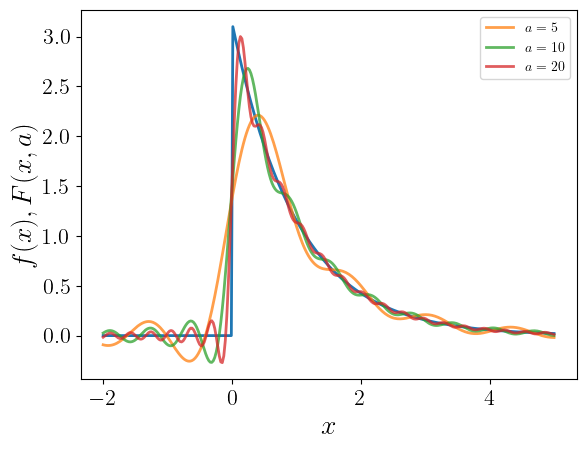

In [10]:
x_inf, x_sup = -2, 5
n_puntos = 300
x_n = np.linspace(x_inf, x_sup, n_puntos)
y_n = np.zeros(x_n.size)

#Calculamos los valores y_n = f_n(x_n)
for i, x_v in enumerate(x_n):
    y_n[i] = f_n(x_v)

# Ahora construimos el gráfico
plt.plot(x_n, y_n)
for a in [5, 10, 20]:
    plt.plot(x_n, F_n(x_n, a), label=f"$a = {{{str(a)}}}$", alpha=0.75)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x), F(x, a)$")
plt.legend()
plt.show()

## Ejercicio 2

La definición de la transformada coseno de Fourier $\hat{f}_c(\omega)$ es
$$ \hat{f}_c(\omega) = \sqrt{\frac{2}{\pi}} \int_0^{\infty} f(x) \cos \omega x \, dx $$

Dado que $f(x) = 0$ para $x > 2$, tenemos
\begin{align}
\hat{f}_c(\omega) &= \sqrt{\frac{2}{\pi}} \left[ \int_0^1 \cos \omega x \, dx + \int_1^2 (-1) \cos \omega x \, dx  \right] \\
&= \sqrt{\frac{2}{\pi}} \left( \left. \frac{\sin \omega x}{\omega} \right|_0^1 - \left. \frac{\sin \omega  x}{\omega}  \right|_1^2  \right) \\
&= \sqrt{\frac{2}{\pi}} \left( \frac{\sin \omega}{\omega} - \frac{\sin 2 \omega}{\omega} + \frac{\sin \omega}{\omega} \right) \\
&= \sqrt{\frac{2}{\pi}} \left( 2 \frac{\sin \omega}{\omega} - \frac{\sin 2 \omega}{\omega} \right) \\
\end{align}

SymPy tiene una función para calcular transformadas coseno de Fourier:

In [11]:
f = Piecewise((1, x < 1), (-1, x < 2), (0, x > 2)) 
Fc = cosine_transform(f, x, w)
Fc

sqrt(2)*(2*sin(w) - sin(2*w))/(sqrt(pi)*w)

Ahora nos movemos al campo numérico para comparar gráficamente la función $f(x)$ con la función aproximada que tenemos con la transformada coseno inversa, tomando un límite superior de integración cada vez mayor.

Primero definimos las funciones `f_n` (que representa $f$) y `f_c` que es la reconstrucción de $f$ a partir de $\hat{f}_c(\omega)$ que calculamos analíticamente arriba:

In [12]:
def f_n(x):
    conds = [x < 1, (x > 1) & (x < 2), x > 2]
    vals = [1, -1, 0]
    return np.piecewise(x, conds, vals)

def f_c(o):
    res = 2 * np.sin(o) / o - np.sin(2 * o)/ o
    return math.sqrt(2 / math.pi) * res

def F_c(x_n, a):
    res = np.zeros(x_n.size)
    omega = np.linspace(0.0001, a, x_n.size)
    delta_omega = omega[1] - omega[0]
    for i, x_val in enumerate(x_n):
        res[i] = np.trapz(f_c(omega) * np.cos(omega * x_val), 
                          dx=delta_omega)
    return math.sqrt(2 / math.pi) * res

Utilizando estas funciones, construimos el gráfico para una lista de valores del límite superior de integración `a`:

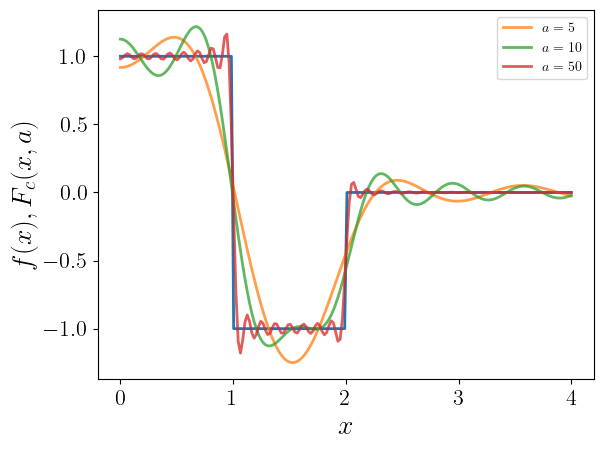

In [13]:
x_sup = 4
n_puntos = 200
x_n = np.linspace(0, x_sup, n_puntos)

plt.plot(x_n, f_n(x_n))
for a in [5, 10, 50]:
    plt.plot(x_n, F_c(x_n, a), label=f"$a = {{{str(a)}}}$", alpha=0.75)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x), F_c(x, a)$")
plt.legend()
plt.show()

## Ejercicio 3

La transformada seno de Fourier está dada por
\begin{align}
\hat{f}_s(\omega) &= \sqrt{\frac{2}{\pi}} \int_0^{\infty} f(x) \sin \omega x \, dx \\
&= \sqrt{\frac{2}{\pi}} \int_0^1 x^2 \sin \omega x \, dx 
\end{align}
Encontrar la primitiva de la última integral se hacer integrando por partes. Pero haremos uso de las capacidades de integración simbólica de SymPy para evitarnos el trabajo:

In [14]:
integrate(x**2 * sin(w * x), (x, 0, 1))

-cos(w)/w + 2*sin(w)/w**2 + 2*cos(w)/w**3 - 2/w**3

Con lo que la transformada buscada resulta
$$ \hat{f}_s(\omega) = \sqrt{\frac{2}{\pi}} \left( - \frac{\cos \omega}{\omega} + 2 \frac{\sin \omega}{\omega^2} + 2 \frac{\cos \omega}{\omega^3} - \frac{2}{\omega^3} \right) $$

Al igual que en el ejercicio anterior, podemos obtener la transformada seno de Fourier en forma simbólica utilizando la función `sine_transform`:

In [15]:
f = Piecewise((x**2, x < 1), (0, x > 1))
Fs = sine_transform(f, x, w)
Fs

sqrt(2)*(-w**2*cos(w) + 2*w*sin(w) + 2*cos(w) - 2)/(sqrt(pi)*w**3)

In [16]:
def f_n(x):
    if x < 1:
        return x**2
    else:
        return 0

def f_s(o):
    res = -np.cos(o) / o + 2 * np.sin(o) / o**2 + 2 * np.cos(o) / o**3 - 2 / o**3
    return math.sqrt(2 / math.pi) * res

def F_s(x_n, a):
    res = np.zeros(x_n.size)
    omega = np.linspace(0.0001, a, x_n.size)
    delta_omega = omega[1] - omega[0]
    for i, x_val in enumerate(x_n):
        res[i] = np.trapz(f_s(omega) * np.sin(omega * f_n(x_val)), dx=delta_omega)
    return math.sqrt(2 / math.pi) * res

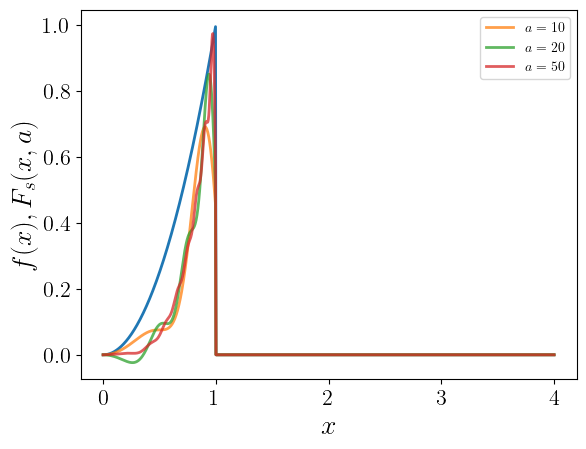

In [17]:
x_sup = 4
n_puntos = 1000
x_n = np.linspace(0, x_sup, n_puntos)
y_n = np.zeros(x_n.size)
for i, x_val in enumerate(x_n):
    y_n[i] = f_n(x_val)

plt.plot(x_n, y_n)
for a in [10, 20, 50]:
    plt.plot(x_n, F_s(x_n, a), label=f"$a = {{{str(a)}}}$", alpha=0.75)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x), F_s(x, a)$")
plt.legend()
plt.show()

## Ejercicio 4

El teorema enuncia que, si las transformadas de Fourier de $f(x)$ y $g(x)$ existen, entonces para cualquier par de constantes $a$ y $b$ existe la transformada de Fourier de $af + bg$, y

\begin{equation}
\mathscr{F}[a f(x) + b g(x)] = a \mathscr{F}(f) + b \mathscr{F}(g)
\tag{4.1}
\end{equation}

La demostración se basa en que la integración es una operación lineal, por lo que la ecuación (4.1) da

\begin{align}
\mathscr{F}[a f(x) + b g(x)] &= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} [a f(x) + b g(x)] e^{-i \omega x} \, dx \\
&= a \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(x) e^{-i \omega x} \, dx + b \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} g(x) e^{-i \omega x} \, dx \\
&= a \mathscr{F}[f(x)] + b \mathscr{F}[g(x)]
\end{align}

## Ejercicio 5

A partir de la definición de la transformada de Fourier tenemos que

\begin{equation}
\mathscr{F}[f'(x)] = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f'(x) e^{-i \omega x} \, dx
\tag{5.1}
\end{equation}

Recordemos que la integración por partes es un proceso que encuentra la integral de un producto de funciones en términos de la integral del producto de sus derivadas y antiderivadas:

\begin{align}
\int_a^b u(x) v'(x) \, dx &= \left[ u(x) v(x) \right]_a^b - \int_a^b u'(x) v(x) \, dx \\
&= u(b) v(b) - u(a) v(a) - \int_a^b u'(x) v(x) \, dx 
\end{align}

O, escribiendo $u = u(x)$ y $du = u'(x) dx$ y $v = v(x)$ y $dv = v'(x) dx$, la fórmula se puede escribir en forma más compacta:

$$ \int u \, dv = u v - \int v \, du $$

Entonces, integrando por partes (5.1) con $u = e^{-i \omega x}$ y $dv = f'(x) dx$:

$$ \mathscr{F}[f'(x)] = \frac{1}{\sqrt{2 \pi}} \left[ \left. f(x) e^{-i \omega x} \right|_{-\infty}^{\infty} - (-i \omega) \int_{-\infty}^{\infty} f(x) e^{-i \omega x} \, dx \right] $$

Dada la condición $f(x) \rightarrow 0$ cuando $|x| \rightarrow \infty$, obtenemos el resultado buscado:

$$ \mathscr{F}[f'(x)] = 0 + \mathscr{F}[f(x)] $$

## Ejercicio 6

Del ejercicio 5 podemos ver que

\begin{align}
\mathscr{F}(x e^{-x^2}) &= \mathscr{F} \left[ -\dfrac{1}{2} \left( e^{-x^2} \right)' \right] \\
&= -\frac{1}{2} \mathscr{F} \left( e^{-x^2} \right)' \\
&= -\frac{1}{2} i\omega \mathscr{F} \left( e^{-x^2} \right) \tag{6.1} \\
\end{align}

La transformada de Fourier de (6.1) se puede obtener por tabla, o realizando la integración que define la transformada. Seguiremos este último camino utilizando la integración simbólica de SymPy:

In [18]:
x = symbols('x', real=True)
w = symbols('w', real=True, positive=True)
integ = 1 / sqrt(2 * pi) * integrate(exp(-x**2) * exp(-I * w *x), (x, -oo, oo))
expand(integ)

sqrt(2)*exp(-w**2/4)/2

Reemplazando el valor obtenido para la transformada de Fourier de $e^{-x^2}$ en (6.1), obtenemos

\begin{equation}
\mathscr{F}(x e^{-x^2}) = -\frac{1}{2} i \omega \frac{\sqrt{2}}{2} e^{-\omega^2/4} = -\frac{\sqrt{2} \, i \omega}{4} e^{-\omega^2/4} 
\tag{6.2}
\end{equation}

Sympy tiene funciones que permiten obtener la transformada de Fourier directamente. Por ejemplo:

In [19]:
fourier_transform(exp(-x**2), x, w)

sqrt(pi)*exp(-pi**2*w**2)

Vemos que esta expresión no coincide con la obtenida en la variable `integ` anterior. Esto se debe a que la definición de la transformada de Fourier que usa SymPy, según su [documentación](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.fourier_transform), es:

$$F(k) = \int_{-\infty}^{\infty} f(x) e^{-2 \pi i x k} \, dx $$

Para que esta definición nos devuelva la definición que usamos en este curso, tenemos que usar:
$$ f(x) \mapsto \frac{1}{\sqrt{2 \pi}} f(x) $$
y
$$ k \mapsto \frac{\omega}{2 \pi} $$

Entonces:

In [21]:
fourier_transform(1/sqrt(2 * pi) * exp(-x**2), x, w/(2 * pi))

sqrt(2)*exp(-w**2/4)/2

## Ejercicio 7

Calculamos la transformada utilizando directamente la definición (aprovechando que $e^{-i \omega x}$ es una función **analítica**):

\begin{align}
\hat{f}(\omega) &= \int_a^b 1 \cdot e^{-i \omega x} \, dx \\
&= \frac{1}{\sqrt{2 \pi}} \left[ \frac{e^{-i \omega x}}{-i \omega} \right]_{x = a}^b \\
&= \frac{1}{-i \omega \sqrt{2 \pi}} \left( e^{-i \omega b} - e^{-i \omega a} \right) \\
&= \frac{i}{\omega \sqrt{2 \pi}} \left( e^{-i \omega b} - e^{-i \omega a} \right) \\
\end{align}

Intentaremos ahora encontrar la transformada de $f(x)$ sin realizar la integración sino usando SymPy para que haga el trabajo por nosotros. Para ello primero tenemos que definir las variables simbólicas `x`, `a`, `b` y `w` (que representa a $\omega > 0$), y a continuación definimos `f` como una función continua a tramos:

In [25]:
x, a, b = symbols('x a b', real=True)
w = symbols('w', real=True, positive=True)
f = Piecewise((0, x < a), (1, x < b), (0, x > b))

Ahora invocamos la función `fourier_transform()` teniendo en cuenta que para que el resultado coincida con nuestra definición de transformada (y no la que usa SymPy por defecto), tenemos que multiplicar la función por $1 / \sqrt{2 \pi}$ y usar como variable $\omega \mapsto \omega / (2 \pi)$:

In [24]:
expand(fourier_transform(1/sqrt(2 * pi) * f, x, w/(2 * pi)))

sqrt(2)*I*exp(-I*w*Max(a, b))/(2*sqrt(pi)*w) - sqrt(2)*I*exp(-I*a*w)/(2*sqrt(pi)*w)

Vemos que el resultado coincide con el obtenido previamente si